In [19]:
import pickle
import librosa
import os
import matplotlib.pyplot as plt
import numpy as np

x = open('/root/storage/DATA/pickle/real_wav','rb')
pick = pickle.load(x)
x.close()

In [20]:
print(pick.shape)

(25, 229, 16000)


In [21]:
def mel_convert(wav):
        def preemphasis(samples, coeff=0.97):
            return np.append(samples[0], samples[1:] - coeff * samples[:-1])

        num_features = 80
        eps = 2 ** -24
        n_fft=512
        win_length=20e-3
        hop_length=10e-3
        center=False
        test = wav
        test = librosa.util.normalize(test)
        test = preemphasis(test, coeff=0.97)
        stft = librosa.stft(test, n_fft=n_fft,
                                    win_length=int(win_length*16000),
                                    hop_length=int(hop_length*16000),
                                    center=center)
        features = np.abs(stft)
        test = features.astype(np.float32)
        normalize='all_features'


        sample_rate = 16000
        mel_basis = librosa.filters.mel(sr=sample_rate,
                                                         n_fft=n_fft,
                                                         n_mels=num_features,
                                                         fmin=0,
                                                         fmax=sample_rate/2,
                                                         htk=False)
        mag = test

        features = np.log(np.dot(mel_basis, mag*mag) + eps)

        # normalize
        if normalize == 'all_features':
            m = np.mean(features)
            s = np.std(features) #+ 1e-5
            features = (features - m) / s
        elif normalize == 'per_feature':
            m = np.mean(features, axis=1, keepdims=True)
            s = np.std(features, axis=1, keepdims=True) + 1e-5
            features = (features - m) / s

        test = features.astype(np.float32)

        return test
    

In [41]:
wav = pick[0,0]

mel = mel_convert(wav)
mfcc = librosa.feature.mfcc(wav)
spec = librosa.stft(wav)

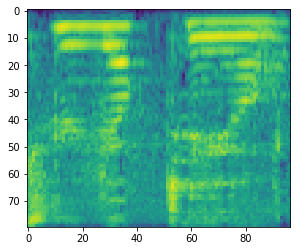

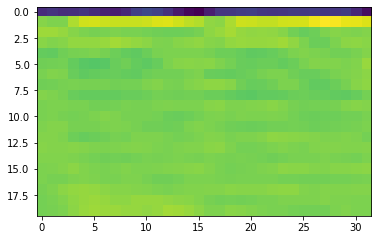

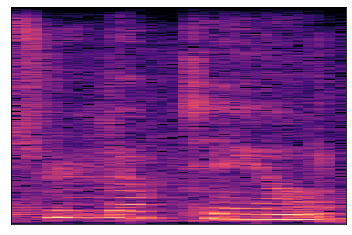

In [44]:
plt.imshow(mel)
plt.show()
plt.imshow(mfcc)
plt.show()

DB = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(DB, sr=16000,hop_length=2048)